In [ ]:
from osgeo import gdal, osr, ogr

In [ ]:
import os

In [ ]:
from matplotlib import pyplot as plt

# How Computers Represent Photographs
An photograph is a recording of light reflected off something (typically refered to as a scene).  When a human observes something visually, it is light reflected off objects that activates specialized cells in the retina.  Photographs work the same way, using a variety of technologies to substitute for the cells of the retina.  Traditional film photography uses a film full of light-sensitive silver salt crystal, part of which becomes metallic silver when exposed to light.  Digital photography uses an array of photosensitive circuits that record the ammount of light.  In either case, what you are left with is (typically but not necessarily) a rectangle that represents the amount of light reflected from a captured scene.
## Rasters
The result of a digital image is called a "raster" an array of values representing the ammount of light at each position.  Below is a sample raster repreented in python as a list of lists of integers.  The first list is the upper row of pixels in our image.  The top left pixel has a value of 255, meaning very bright.  The bottom right has a value of 60, rather dark. 

In [ ]:
image = [[255,200,180,180,180],
         [200,200,100,100,100],
         [180,180,80, 100, 80],
         [170,170,70, 100, 60],
         [160,160,60, 100, 60]]

A typical pixel in a computer image will have values that range from 0 to 255.  Think about what we learned about how computers represent numbers.  What does this mean about the underlying data structure of a pixel?

In python we can view images with a library called "matplotlib".  Matplotlib can do lots of things including make many different types of graphs.  Now we'll use the imshow function to display our image above.

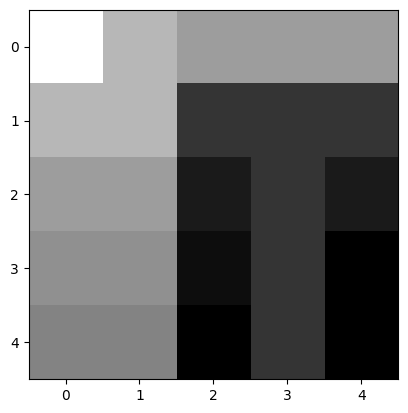

In [26]:
plt.imshow(image, cmap="gray")

Now, try to make you own "image" using a list of lists, and display it with matplotlib.

## Color photography
The sensors (silver salt or digitial circuit) record the *ammount* of light that hit them, not necessarily the *color* of light.  So how do we get color images?  Humans see color because specific types of cells in the retina are sensitive to specific wavelengths of light.  Humans are sensitive to red, green, and blue light (see below).
![human color sensitivity](https://upload.wikimedia.org/wikipedia/commons/f/f1/1416_Color_Sensitivity.svg)
Our eyes take in the ammount of red, green, and blue light in what we see, and construct color based on that.  We can mimic that with a digital image by recording the ammount of red, green, and blue light.  This can be done by filtering out different types of light, but you can think of a digital camera as, like an eye, having three different types of sensors.  When a computer displays an image, rather than each pixel representing a certain ammount of light, like in our example above, each "pixel" is three lights, one red, one green, and one blue.  Each light as a brightness that corresponds to the relative ammount of that color light in that part of the scene.  Put your phone screen under a microscope sometime, you'll see that it's actually made up of a bunch of red, green,. and blue lights!
### Color rasters
But how do we store this on a computer?  Whereas before, we had a list of lists, or an array where each value was the ammount of light reflected from a scene, instead we could have each value be a tuple contaning the ammount of red, green, and blue light!

pixel = (120, 0, 120)

This would lead us to an image that would be something like this:

In [2]:
color_image = [[(120, 0, 120), (120, 10, 120), (120, 20, 120)],
               [(130, 0, 120), (120, 10, 130), (130, 20, 130)],
               [(140, 0, 120), (130, 10, 130), (140, 20, 140)]]

Typically, for reasons that aren't important now, instead of images being stored as 2d arrays of tuples of 3, they are stored as 3 2d arrays, each array representing a different type of light, often called a "band".

### Viewing images in python
Along with this python notebook, are some image files for a satelite iamge of the Boulder area.  There are four files, each for a different band.  These files are in a "geotiff" format.  "tiff" is a commonly use duncopressed image file, and geotiff signifies that it has some additional metadata on the spatial location of the image.  This is a commonly used format for GIS raster data.  Because it's common, there are a few ways we can read this data in Python.
First we can use the library matplot to read in the image as a numpy array

In [5]:
blue_band = plt.imread("sample_landsat_Blue.TIF")
blue_band

array([[8551, 8703, 8644, ..., 9136, 9153, 9502],
       [8879, 8780, 8181, ..., 9132, 9086, 9586],
       [8584, 8247, 7888, ..., 8733, 8880, 9367],
       ...,
       [8083, 8396, 8903, ..., 9048, 8824, 8945],
       [8167, 8332, 9045, ..., 8941, 8798, 9179],
       [8252, 8182, 8477, ..., 8948, 9113, 9661]], dtype=uint16)

Above we see the different corners of the array, with many of the pixels omited.  Since this is the blue band, the numbers refer to relative ammount of blue light reflected at that part of the sattelite image. 

Since this is an array, we can see the dimensions by looking a the shape value, and also look at the range of values:refer

In [1]:
print("Array dimensions: %s" % str(blue_band.shape))
print("Minimum Blue Value: %d" % blue_band.min())
print("Maximum Blue Value: %d" % blue_band.max())

NameError: name 'blue_band' is not defined

In [2]:
plt.imshow(blue_band, cmap="Blues", norm="log")

NameError: name 'plt' is not defined

Here we've plotted and colored the blue band with darker blues representing higher values of blue light.  The norm argunment we suplied above is how matplotlib scales the values of blue (0, 37820) between the blue colors matplotlib has.  It doesn't have 37,000 shades of blue so by passing the "log" norm, it assigns the values ot shades of blue on a log scale.  This makes it easier to distinguish features as compared to a linear scale.  Why do you think this might be?

Try plotting a different color band with the imshow function.  Play around with the different arguments available.

## From images to spectral data
Sure humans typically only distinguish between red, green, and blue light, but we can build sensors to distinguish between all sorts of different parts of the electromagnetic spectrum.
![the electromagnetic spectrum](https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Electromagnetic-Spectrum.svg/1024px-Electromagnetic-Spectrum.svg.png)
A common "band" of the spectrum of interest to a wide range of scientists is the "infrared" section, netween visible light and radio waves.  This section of the spectrum can capture thermal radiation, like the heat off of a body (ever seen a picture from "night vision" goggles?" and has a wide range of applications, including vegetation health.

The satelite (Landsat 8) that captured the sattelite image of Boulder contains a few bands beyond the visible spectrum.  We've included the near infrared band, but read about the Landsat satelite and other bands it includes.  Do you have any ideas about how you could use other bands?